In [1]:
import pandas as pd
import seaborn as sns

In [3]:
pbp = pd.read_csv('pbp_data/play_by_play_2020.csv.gz', compression='gzip', low_memory=False)

In [65]:
passes = pbp.loc[pbp.pass_attempt==1].copy()
passes['ayts'] = passes['air_yards']-passes['ydstogo']

SEA: % short of sticks: 71.43%; avg AYTS: -4.6
Rest of NFL: % short of sticks: 61.24%; avg AYTS: -2.3


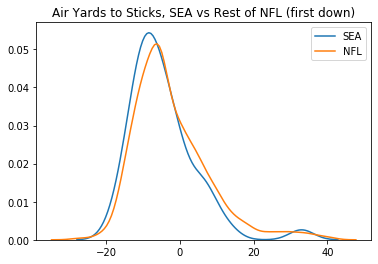

In [67]:
def pct_short_fn(df):
    return len(df.loc[df.ayts<0])/len(df)

def ayts_dist_vs_mean(posteam, downs=[1,2,3,4]):
    pos_passes = passes.loc[(pbp.posteam==posteam) & (passes.down.isin(downs))]
    rest_passes = passes.loc[(passes.posteam!=posteam) & (passes.down.isin(downs))]
    ax = sns.kdeplot(pos_passes.ayts)
    sns.kdeplot(rest_passes.ayts)
    title = f"Air Yards to Sticks, {posteam} vs Rest of NFL ("
    if len(downs)==1:
        ordinal = {1:'first', 2:'second', 3:'third', 4:'fourth'}
        title+=f"{ordinal[downs[0]]} down)"
    else:
        title+=f"Downs: {str(downs)})"
    ax.set(title=title)
    ax.legend([posteam, "NFL"])
    print(f"{posteam}: % short of sticks: {pct_short_fn(pos_passes)*100:.2f}%; avg AYTS: {pos_passes.ayts.mean():.1f}")
    print(f"Rest of NFL: % short of sticks: {pct_short_fn(rest_passes)*100:.2f}%; avg AYTS: {rest_passes.ayts.mean():.1f}")
    
ayts_dist_vs_mean('SEA', downs=[1])

SEA: % short of sticks: 51.28%; avg AYTS: 1.5
Rest of NFL: % short of sticks: 56.33%; avg AYTS: -1.5


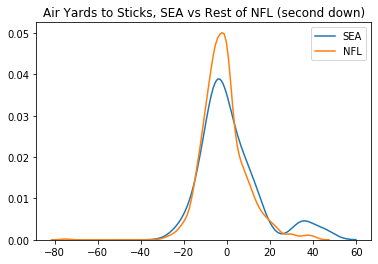

In [68]:
ayts_dist_vs_mean('SEA', downs=[2])

SEA: % short of sticks: 36.36%; avg AYTS: 4.3
Rest of NFL: % short of sticks: 37.36%; avg AYTS: 1.1


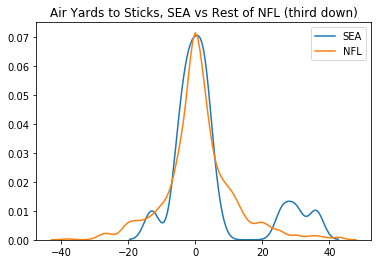

In [69]:
ayts_dist_vs_mean('SEA', downs=[3])